### 📌ACTIVIDAD 4: APLICAR SVR, ÁRBOLES Y RAMDOMFOREST

Crea el notebook saa_u03_p01_a4-<JMP>.ipynb donde entregar esta actividad. Intenta encontrar un modelo regresor basado en SVR o CART o RandomForestRegressor de sklearn.ensemble que mejore los resultados del tasador de pisos que elegiste en una práctica de la unidad anterior

### ENTREGA 8: Muestra código y capturas de ejecución de configuración y medición de desempeño con gráficos de:

a) Un regresor con SVM

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_excel('datos_viviendas.xlsx')
display(df.head())

# Preprocesamiento mínimo
df = df.dropna()

# Separar variables predictoras y objetivo
X = df.drop('josrosrod_precio', axis=1)
y = df['josrosrod_precio']

# Convertir variables categóricas (si las hay)
X = pd.get_dummies(X, drop_first=True)


,josrosrod_origen,jorosrod_municipio,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,alvbelnav_iluminacion,davsoreng_duplex,...,rafmaralf_baños,luctarcom_orientacion,samartlop_superficie,davroctau_planta,juamarper_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
0,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.395,39.418,140000.0,Alta,0.0,...,1.0,Sureste,81.0,1.0,1.0,3.0,1.0,6.0,1.0,0.0
1,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.398,39.417,85000.0,Alta,0.0,...,1.0,Este,161.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0
2,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3987,39.4149,225000.0,Alta,0.0,...,2.0,Este,179.0,1.0,1.0,3.0,0.0,6.0,1.0,0.0
3,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.399,39.4145,129999.0,Alta,0.0,...,1.0,Sur,89.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0
4,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3985,39.4133,145000.0,Baja,0.0,...,1.0,Oeste,55.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


Dividir y escalar los datos

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar para SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### a) Un regresor con SVM

📈 SVR - R2: -0.15945733893838954
📉 SVR - MSE: 55761734476.77461


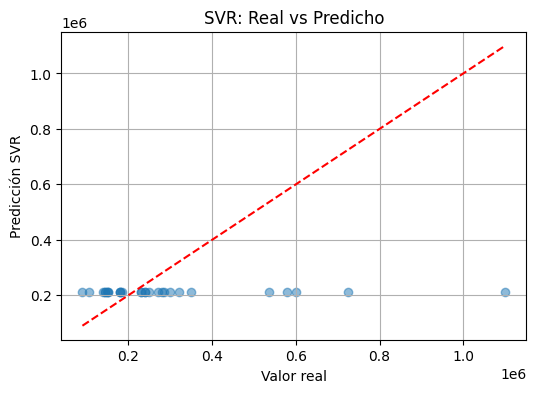

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("📈 SVR - R2:", r2_score(y_test, y_pred_svr))
print("📉 SVR - MSE:", mean_squared_error(y_test, y_pred_svr))

# Gráfico
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción SVR")
plt.title("SVR: Real vs Predicho")
plt.grid()
plt.show()


#### b) Un regresor basado en árboles de decisión

📈 Árbol - R2: 0.2941423872976653
📉 Árbol - MSE: 33946781357.17857


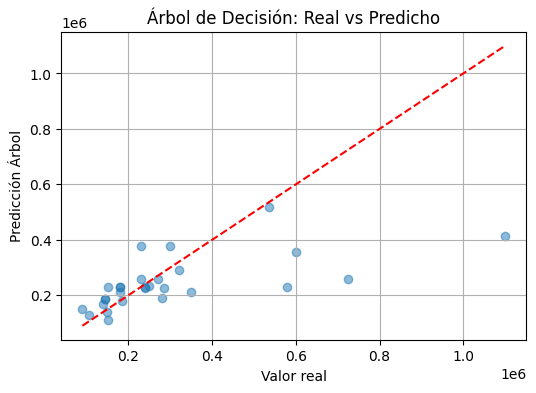

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("📈 Árbol - R2:", r2_score(y_test, y_pred_tree))
print("📉 Árbol - MSE:", mean_squared_error(y_test, y_pred_tree))

# Gráfico
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción Árbol")
plt.title("Árbol de Decisión: Real vs Predicho")
plt.grid()
plt.show()


#### c) Un regresor basado en RandomForestRegressor o e GradientBoostingRegressor

📈 RandomForest - R2: 0.2470594546014353
📉 RandomForest - MSE: 36211138917.586006


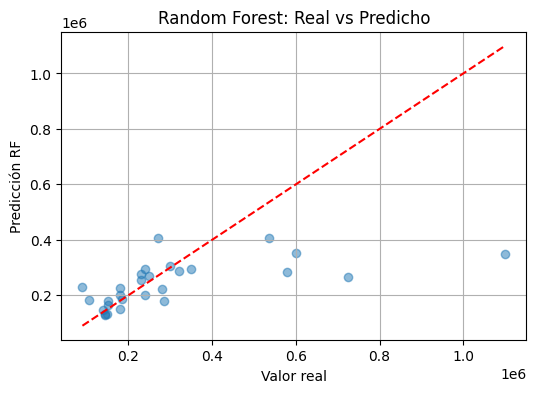

C:\Users\juan_\AppData\Local\Temp\ipykernel_325112\1014175196.py:23: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juan_\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


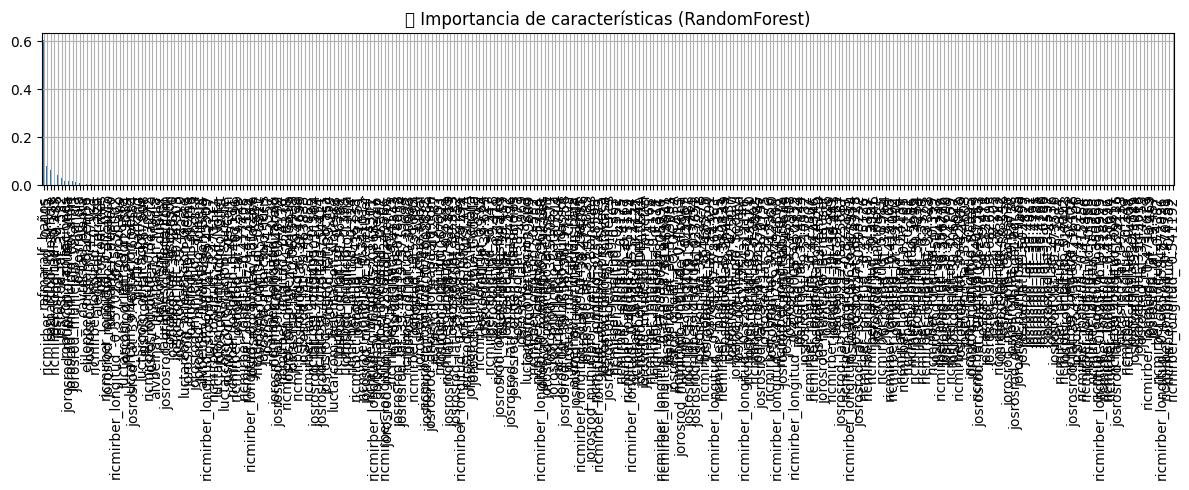

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("📈 RandomForest - R2:", r2_score(y_test, y_pred_rf))
print("📉 RandomForest - MSE:", mean_squared_error(y_test, y_pred_rf))

# Gráfico
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción RF")
plt.title("Random Forest: Real vs Predicho")
plt.grid()
plt.show()

# Importancia de características
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind="bar", figsize=(12, 5), title="🎯 Importancia de características (RandomForest)")
plt.tight_layout()
plt.grid()
plt.show()
